
<h1 id="(Optional)-웹-크롤링2---Dynamic-Crawling">(Optional) 웹 크롤링2 - Dynamic Crawling<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#(Optional)-%EC%9B%B9-%ED%81%AC%EB%A1%A4%EB%A7%812---Dynamic-Crawling">¶</a></h1>



<h1 id="0.-라이브러리">0. 라이브러리<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#0.-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC">¶</a></h1>


In [5]:
pip install selenium #셀레니움 설치

Note: you may need to restart the kernel to use updated packages.


In [33]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame
import time
from IPython.display import Image




<h1 id="1.-Selenium-기초">1. Selenium 기초<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#1.-Selenium-%EA%B8%B0%EC%B4%88">¶</a></h1><p>자신의 크롬 버전을 확인하고 크롬 <a href="https://chromedriver.chromium.org/downloads">웹드라이버</a>를 다운받아놓아야합니다.</p>
<ul>
<li>2020.09.13 기준 최신 버전: <code>85.0.4183.102</code></li>
</ul>



<h3 id="1.1.-Simple-Text-Crawling">1.1. Simple Text Crawling<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#1.1.-Simple-Text-Crawling">¶</a></h3><p>지니뮤직 사이트에서 노래 제목을 크롤링해보자</p>
<p>URL: <a href="https://www.genie.co.kr/chart/top200">https://www.genie.co.kr/chart/top200</a></p>


In [2]:
DRIVER_PATH = 'C:/Users/ajou/Documents/chromedriver.exe' #구글드라이버 설치한 경로 삽입

In [15]:
# chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH) #driver변수에 드라이버 경로삽입
driver.implicitly_wait(10) #implicity_wait는 브라우저에서 사용되는 엔진 자체에서 파싱되는 시간을 기다려 주는 메소드이다. 10초를 기다려준다.

url = "https://www.genie.co.kr/chart/top200" #지니뮤직 url을 삽입한다.

driver.get(url) #driver에 url을 삽입한다. 
html = driver.page_source #페이지 소스를 html에 저장
soup = BeautifulSoup(html, 'html.parser') #html을 파싱한다.

# title crawling
title = WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.CSS_SELECTOR, "#body-content > div.newest-list > div > table > tbody > tr:nth-child(1) > td.info > a.title.ellipsis")))
#웹에서 복사한 Css_selector값을 넣고 element를 css_selctor로 받을때까지 20초간 기다린다.


print("Title: {}".format(title.text))
title.text #TOP200중 첫번째 타이틀을 가져온다.


Title: Bad Boy


'Bad Boy'


<p>css selector의 <strong><code>규칙</code></strong>을 찾아본다</p>
<ul>
<li>1번째 제목: #body-content > div.newest-list > div > table > tbody > tr:nth-child(1) > td.info > a.title.ellipsis</li>
<li>2번째 제목: #body-content > div.newest-list > div > table > tbody > tr:nth-child(2) > td.info > a.title.ellipsis</li>
</ul>
<p>.
.
.</p>
<ul>
<li>100번째 제목: #body-content > div.newest-list > div > table > tbody > tr:nth-child(100) > td.info > a.title.ellipsis</li>
</ul>
<hr/>
<p>또는 <code>XPATH</code>로도 확인해보자 (<code>full Xpath</code>)</p>
<ul>
<li>1번째 제목: //*[@id="body-content"]/div[6]/div/table/tbody/tr[1]/td[5]/a[1]</li>
<li>2번째 제목: //*[@id="body-content"]/div[6]/div/table/tbody/tr[2]/td[5]/a[1]</li>
</ul>
<p>.
.
.</p>
<ul>
<li>50번째 제목: //*[@id="body-content"]/div[6]/div/table/tbody/tr[50]/td[5]/a[1]</li>
</ul>


In [20]:

# 2번째 제목 크롤링
WebDriverWait(driver, 20) \
    .until(EC.presence_of_element_located((By.XPATH, "//*[@id='body-content']/div[6]/div/table/tbody/tr[2]/td[5]/a[1]"))).text
#XPATH에 할당한 주소의 element들이 반환될 때까지 20초 기다린다.


'Dynamite'


<h3 id="1.2.-Text-Crawling-with-for-loop">1.2. Text Crawling with for loop<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#1.2.-Text-Crawling-with-for-loop">¶</a></h3><p>위에서 찾은 Xpath의 규칙을 바탕으로 for loop 만들자</p>


In [23]:

 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.genie.co.kr/chart/top200"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []

# title crawling (TOP 50)
for i in range(1, 51): #밑의 XPATH값에 1부터 50까지 삽입하여 title_list에 iist삽입한다.
    title = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f"//*[@id='body-content']/div[6]/div/table/tbody/tr[{i}]/td[5]/a[1]")))
    title_list.append(title.text)
    
print(title_list)



['Bad Boy', 'Dynamite', 'Tight', '오래된 노래', 'When We Disco (Duet With 선미)', '취기를 빌려 (취향저격 그녀 X 산들)', '내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)', '눈누난나 (NUNU NANA)', '에잇 (Prod. & Feat. SUGA of BTS)', '다시 여기 바닷가', '마리아 (Maria)', '이제 나만 믿어요', '축하해', 'Not Shy', '내일은 고백할게', 'How You Like That', 'Ice Cream (With Selena Gomez)', '오래된 노래', '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)', 'Dolphin', '홀로', 'Downtown Baby', '만개 (Prod. 신지후)', '나의 시간은', 'Blueming', '덤디덤디 (DUMDi DUMDi)', '아로하', '살짝 설렜어 (Nonstop)', '어느 60대 노부부이야기', 'METEOR', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야', '숲의 아이 (Bon voyage)', '어떻게 지내 (Prod. by VAN.C)', 'Dance Monkey', '아틀란티스 소녀 (Atlantis Princess)', '우산이 없어요', 'ON', '사랑하게 될 줄 알았어', '바램', '2002', '살았소', 'Memories', "Don't Start Now", '거짓말이라도 해서 널 보고싶어', 'Summer Hate (Feat. 비)', '신난다 (Feat. 마마무)', '보라빛 엽서', '듣고 싶던 말', '그 여름을 틀어줘', '모든 날, 모든 순간 (Every day, Every Moment)']



<p>나중에 필요한 변수(제목, 가수, 가사... 등)을 모두 긁어 한번에 <strong>데이터프레임</strong>으로 저장하여 보관한다!</p>



<h3 id="1.3.-Text-Crawling-(Click-&amp;-Back)">1.3. Text Crawling (Click &amp; Back)<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#1.3.-Text-Crawling-(Click-&amp;-Back)">¶</a></h3><p>클릭하고 나오기 -&gt; 동적 크롤링 가능 (<strong><code>가사</code></strong> 크롤링 가능)</p>
<p>노래 제목에 링크가 걸려있기 때문에, 해당 링크까지의 <strong>XPath</strong>를 추가한다.</p>


In [24]:

 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.genie.co.kr/chart/top200"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 1번째 click하기
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="body-content"]/div[6]/div/table/tbody/tr[1]/td[4]/a')))
#click_elemnent변수에 click할 XPATH의 값을 삽입한다.
click_element.click()     
#click_element를 클릭한다.

# back
# 뒤로가기이다.
driver.back()


# 2번째 click하기
#위와 동일하나 XPATH의 값을 1 -> 2로 바꾸어 2번째 항목에 들어가게 한다.
click_element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '//*[@id="body-content"]/div[6]/div/table/tbody/tr[2]/td[4]/a')))
click_element.click()    

# back
# 뒤로가기 선택
driver.back()




<h3 id="1.4.-Text-Crawling-including-contents">1.4. Text Crawling including contents<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#1.4.-Text-Crawling-including-contents">¶</a></h3><ul>
<li><p><strong>1.2</strong>처럼 for문과 함께 써보자! (첫 페이지 5개의 글에 대해 <code>title</code>, <code>artist</code>, <code>heart</code>(하트 갯수), <code>lyrics</code>(가사)를 크롤링</p>
</li>
<li><p><strong>1.3</strong>에서 사용한 click &amp; back을 활용하자</p>
</li>
</ul>


In [26]:

 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.genie.co.kr/chart/top200"
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
title_list = []
artist_list = []
heart_list = []
lyrics_list = []

# crawling (TOP 5)
for i in range(1, 6):
    # click
    # tr뒤에 [{i}]를 삽입하여 1부터 5까지의 곡 정보에 들어가는 코드이다.
    click_element = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.XPATH, f'//*[@id="body-content"]/div[6]/div/table/tbody/tr[{i}]/td[4]/a')))
    click_element.click()

    # title crawling
    title = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#body-content > div.song-main-infos > div.info-zone > h2")))
    title_list.append(title.text)

    # artist crawling
    artist = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#body-content > div.song-main-infos > div.info-zone > ul > li:nth-child(1) > span.value > a")))
    artist_list.append(artist.text)
    
    # heart crawling
    heart = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#emLikeCount")))
    heart_list.append(heart.text)

    # lyrics crawling
    lyrics = WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#pLyrics")))
    lyrics_list.append(lyrics.text)
    
    # back
    driver.back()
    
print(title_list)
print(artist_list)
print(heart_list)
print(lyrics_list)



['Bad Boy', 'Dynamite', 'Tight', '오래된 노래', 'When We Disco (Duet With 선미)']
['청하 & Christopher', '방탄소년단', '10CM', 'Standing Egg (스탠딩 에그)', '박진영']
['5,128', '49,900', '3,203', '36,667', '14,261']
["       Bad Boy - 03:03\n       I'm not trying to be dramatic\nBut I need someone,\nwho can take a little heat\nYou wanted thunder,\nnow you have it\nI want a boyfriend,\nwho can handle all of me\n \nIt feels like\nYesterday\nYesterday\nYesterday\nWe were making out\nand reaching for the stars\nBut Not today\nNot today\nNot today\n'Cause you\nNow you say you wanna\n \nBad boy\nAll the good girls think they need a\nBad boy\nAnd all this time\nI've tried not to be a\nBad boy\nWhat they really do, shit\nI'm not good at being cool\nWhen it comes to you\nWhen it comes to you\n \nFirst you're running me over\nThen you like\nwhy you making a scene\nAre you gonna blame this on me\nDon't be acting all sweet to\nget to my head\nand then just go mean\nLook what you're doing to me\n \nIt feels like yesterd


<h3 id="TIP:-보통은-결과값을-데이터프레임-형태로-저장한다">TIP: 보통은 결과값을 <code>데이터프레임</code> 형태로 저장한다<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#TIP:-%EB%B3%B4%ED%86%B5%EC%9D%80-%EA%B2%B0%EA%B3%BC%EA%B0%92%EC%9D%84-%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84-%ED%98%95%ED%83%9C%EB%A1%9C-%EC%A0%80%EC%9E%A5%ED%95%9C%EB%8B%A4">¶</a></h3>


In [28]:

# 결과 변수
raw_result = {'title': title_list,
              'artist': artist_list,
              'heart': heart_list,
          'lyrics': lyrics_list}


result = pd.DataFrame(raw_result)


# driver 종료
driver.quit()



In [29]:
# csv 파일로 save
# 쓰기도 가능하게 끔 mode='w'를 설정해주었다.
result.to_csv("MelonTop5.csv", mode='w')



<p><strong><code>데이터프레임</code></strong> 형식을 이용하면, 가독성도 좋고, 나중에 데이터 핸들링하기에도 편리하다!</p>



<h1 id="2.-Image-Crawling">2. Image Crawling<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#2.-Image-Crawling">¶</a></h1><p>이미지 크롤링하기</p>
<ul>
<li>1번째 이미지: /html/body/div/div[3]/div/div/div[4]/form/div/table/tbody/tr[<strong>1</strong>]/td[4]/div/a/img</li>
<li>2번째 이미지: /html/body/div/div[3]/div/div/div[4]/form/div/table/tbody/tr[<strong>2</strong>]/td[4]/div/a/img</li>
</ul>
<p>...</p>
<ul>
<li>50번째 이미지: /html/body/div/div[3]/div/div/div[4]/form/div/table/tbody/tr[<strong>50</strong>]/td[4]/div/a/img</li>
</ul>



<h4 id="STEP1.-URL-Crawling">STEP1. URL Crawling<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#STEP1.-URL-Crawling">¶</a></h4>


In [30]:

 # chrome driver 설정
driver = webdriver.Chrome(DRIVER_PATH)
driver.implicitly_wait(10)

url = "https://www.genie.co.kr/chart/top200"

driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 변수
link_list = []

# # img crawling (TOP 50)
for i in range(1, 51):
    
    img = WebDriverWait(driver, 20) \
        .until(EC.presence_of_element_located((By.CSS_SELECTOR, f"#body-content > div.newest-list > div > table > tbody > tr:nth-child({i}) > td:nth-child(3) > a > img")))
    #이미지 css_selector 태그중 src속성만을 가져와서 링크리스트에 추가한다.
    link_list.append(img.get_attribute('src'))

print(link_list)



['https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/602/010/81602010_1600840500723_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/545/399/81545399_1600401677905_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/599/347/81599347_1600756498398_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/080/309/890/80309890_1346636754128_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/536/457/81536457_1597212840968_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/546/430/81546430_1597993783430_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/508/741/81508741_1595227914432_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/522/407/81522407_1596093069434_1_140x140.JPG/dims/resize/Q_80,0', 'https://cdnimg.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/487/694/81487694_1593


<h4 id="STEP2.-Download-images-using-URLs">STEP2. Download images using URLs<a class="anchor-link" href="https://eclass2.ajou.ac.kr/bbcswebdav/pid-677816-dt-content-rid-9690517_1/courses/2020U00020032020084481/Crawling_exercise2.html#STEP2.-Download-images-using-URLs">¶</a></h4><p>자신의 디렉토리에 <code>img</code> 폴더 생성하고 실행</p>


In [32]:

import urllib.request

count = 0
for link in link_list:
    count += 1
    urllib.request.urlretrieve(link, './img/img' + str(count) + '.jpg') #img폴더에 mig+랭크숫자+.jpg으로 확장자명을 사용하여 저장한다.
    



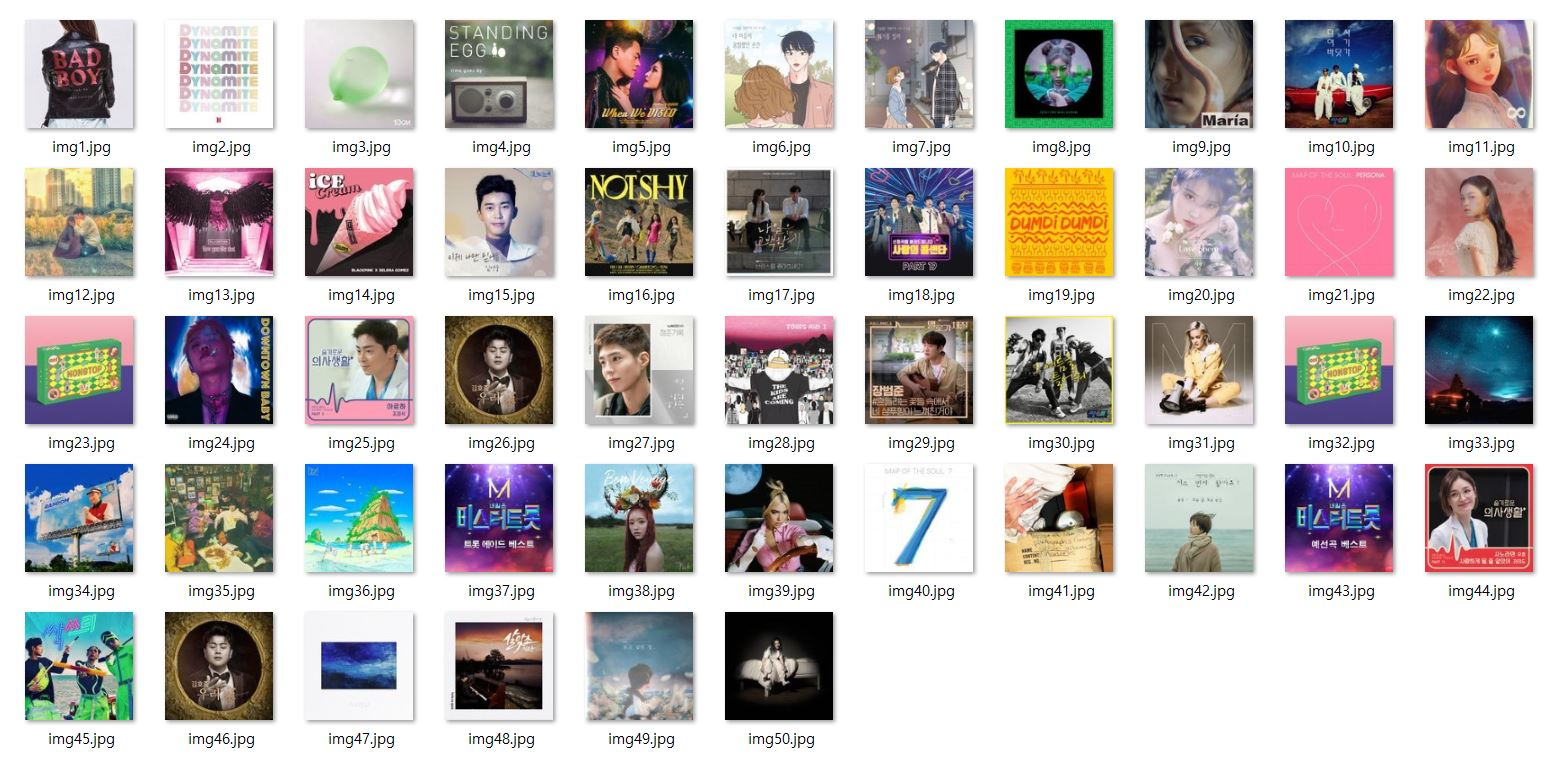

In [34]:
Image("캡처.JPG")